# Building Car of the Future
# Linear Regression Modelling
# Author: Lu (Christina) Jin

# Setup: Import all libraries

In [9]:
install.packages("plyr")
install.packages("FSA")
install.packages("FSAdata")
install.packages("magrittr")
install.packages("dplyr")
install.packages("plotrix")
install.packages("ggplot2")
#install.packages("tidyverse")
install.packages("GGally")
install.packages("ISLR")
install.packages("moments")
install.packages("reticulate")

Warning message:
"package 'plyr' is in use and will not be installed"Warning message:
"package 'FSA' is in use and will not be installed"Warning message:
"package 'FSAdata' is in use and will not be installed"Warning message:
"package 'magrittr' is in use and will not be installed"Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'plotrix' is in use and will not be installed"Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"package 'GGally' is in use and will not be installed"Warning message:
"package 'ISLR' is in use and will not be installed"Warning message:
"package 'moments' is in use and will not be installed"

package 'reticulate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\Rtmpiu4CCw\downloaded_packages


In [11]:
library("plyr")
library("FSA")
library("FSAdata")
library("magrittr")
library("dplyr")
library("plotrix")
library("ggplot2")
#library(tidyverse)
library(GGally)
library(ISLR)
library("moments")
library(colorspace)
library(RColorBrewer)
#library(vcd)
library(reticulate)

Warning message:
"package 'reticulate' was built under R version 3.6.3"

In [40]:
#specifying which version to use
use_python('C:\\PROGRA~1\\Python35\\python.exe')
#importing required bridge libraries/modules
sns <- import('seaborn')
plt <- import('matplotlib.pyplot')
pd <- import('pandas')
matplotlib <- import("matplotlib")
matplotlib$use("Agg", force = TRUE)
plt <- import("matplotlib.pyplot")
fig <- plt$figure(figsize=c(14,8))

options( warn = -1 )

# Acquiring Dataset 

In [42]:
# Read data
car_df <- read.csv("C:/Users/Lu_ki/OneDrive - Northeastern University/NU Master Courseworks/Term 3_2021 Spring/ALY6020/Projects and Assignments/M2 - Liner Regression/car.csv")
headtail(car_df,n=5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model.Year,US.Made
1,18,8,307,130,3504,12.0,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11.0,70,1
4,16,8,304,150,3433,12.0,70,1
5,17,8,302,140,3449,10.5,70,1
394,27,4,140,86,2790,15.6,82,1
395,44,4,97,52,2130,24.6,82,0
396,32,4,135,84,2295,11.6,82,1
397,28,4,120,79,2625,18.6,82,1
398,31,4,119,82,2720,19.4,82,1


# Part 1: Perform Basic Data Cleaning

In [43]:
# investigate data set
summary(car_df)
str(car_df)

      MPG          Cylinders      Displacement     Horsepower      Weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150    : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   90     : 20   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   88     : 19   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   110    : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100    : 17   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75     : 14   Max.   :5140  
                                                 (Other):288                 
  Acceleration     Model.Year       US.Made      
 Min.   : 8.00   Min.   :70.00   Min.   :0.0000  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:0.0000  
 Median :15.50   Median :76.00   Median :1.0000  
 Mean   :15.57   Mean   :76.01   Mean   :0.6256  
 3rd Qu.:17.18   3rd Qu.:79.00   3rd Qu.:1.0000  
 Max.   :24.80   Max.   :82.00   Max.   :1.0000  
                          

'data.frame':	398 obs. of  8 variables:
 $ MPG         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ Cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ Horsepower  : Factor w/ 94 levels "?","100","102",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ Weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ Acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ Model.Year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ US.Made     : int  1 1 1 1 1 1 1 1 1 1 ...


In [44]:
# listing distinct values in hoursepower
unique(car_df$Horsepower)

[1] 130 165 150 140 198 220 215 225 190 170 160 95  97  85  88  46  87  90  113
[20] 200 210 193 ?   100 105 175 153 180 110 72  86  70  76  65  69  60  80  54 
[39] 208 155 112 92  145 137 158 167 94  107 230 49  75  91  122 67  83  78  52 
[58] 61  93  148 129 96  71  98  115 53  81  79  120 152 102 108 68  58  149 89 
[77] 63  48  66  139 103 125 133 138 135 142 77  62  132 84  64  74  116 82 
94 Levels: ? 100 102 103 105 107 108 110 112 113 115 116 120 122 125 ... 98

In [45]:
# observing the number of unknown values in horsepower
count(car_df,Horsepower)

Horsepower,n
?,6
100,17
102,1
103,1
105,12
107,1
108,1
110,18
112,3
113,1


>**After noticing there are missing values in the horsepower column, we have observed the number of missing values. Since there are only 6 unknowns, it's a very insignificant amount, so I have decided to just remove these rows with missing values without replacing them with something else.**

In [46]:
# replacing "?" with NA
car_df$Horsepower <- na_if(car_df$Horsepower, "?")
car_df$Horsepower
tail(car_df, n=25)

# remove rows with missing data
car <- na.omit(car_df)
tail(car, n=25)

# reset the index after removing rows
rownames(car) <- NULL
tail(car)

[1] 130  165  150  150  140  198  220  215  225  190  170  160  150  225  95  
 [16] 95   97   85   88   46   87   90   95   113  90   215  200  210  193  88  
 [31] 90   95   <NA> 100  105  100  88   100  165  175  153  150  180  170  175 
 [46] 110  72   100  88   86   90   70   76   65   69   60   70   95   80   54  
 [61] 90   86   165  175  150  153  150  208  155  160  190  97   150  130  140 
 [76] 150  112  76   87   69   86   92   97   80   88   175  150  145  137  150 
 [91] 198  150  158  150  215  225  175  105  100  100  88   95   46   150  167 
[106] 170  180  100  88   72   94   90   85   107  90   145  230  49   75   91  
[121] 112  150  110  122  180  95   <NA> 100  100  67   80   65   75   100  110 
[136] 105  140  150  150  140  150  83   67   78   52   61   75   75   75   97  
[151] 93   67   95   105  72   72   170  145  150  148  110  105  110  95   110 
[166] 110  129  75   83   100  78   96   71   97   97   70   90   95   88   98  
[181] 115  53   86   81   92   79   83   140  150  120  152  100  105  81   90  
[196] 52   60   70   53   100  78   110  95   71   70   75   72   102  150  88  
[211] 108  120  180  145  130  150  68   80   58   96   70   145  110  145  130 
[226] 110  105  100  98   180  170  190  149  78   88   75   89   63   83   67  
[241] 78   97   110  110  48   66   52   70   60   110  140  139  105  95   85  
[256] 88   100  90   105  85   110  120  145  165  139  140  68   95   97   75  
[271] 95   105  85   97   103  125  115  133  71   68   115  85   88   90   110 
[286] 130  129  138  135  155  142  125  150  71   65   80   80   77   125  71  
[301] 90   70   70   65   69   90   115  115  90   76   60   70   65   90   88  
[316] 90   90   78   90   75   92   75   65   105  65   48   48   67   67   67  
[331] <NA> 67   62   132  100  88   <NA> 72   84   84   92   110  84   58   64  
[346] 60   67   65   62   68   63   65   65   74   <NA> 75   75   100  74   80  
[361] 76   116  120  110  105  88   85   88   88   88   85   84   90   92   <NA>
[376] 74   68   68   63   70   88   75   70   67   67   67   110  85   92   112 
[391] 96   84   90   86   52   84   79   82  
94 Levels: ? 100 102 103 105 107 108 110 112 113 115 116 120 122 125 ... 98

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model.Year,US.Made
374,24,4,140,92,2865,16.4,82,1
375,23,4,151,NA,3035,20.5,82,1
376,36,4,105,74,1980,15.3,82,0
377,37,4,91,68,2025,18.2,82,0
378,31,4,91,68,1970,17.6,82,0
379,38,4,105,63,2125,14.7,82,1
380,36,4,98,70,2125,17.3,82,1
381,36,4,120,88,2160,14.5,82,0
382,36,4,107,75,2205,14.5,82,0
383,34,4,108,70,2245,16.9,82,0


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model.Year,US.Made
373,27,4,151,90,2735,18.0,82,1
374,24,4,140,92,2865,16.4,82,1
376,36,4,105,74,1980,15.3,82,0
377,37,4,91,68,2025,18.2,82,0
378,31,4,91,68,1970,17.6,82,0
379,38,4,105,63,2125,14.7,82,1
380,36,4,98,70,2125,17.3,82,1
381,36,4,120,88,2160,14.5,82,0
382,36,4,107,75,2205,14.5,82,0
383,34,4,108,70,2245,16.9,82,0


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model.Year,US.Made
387,27,4,151,90,2950,17.3,82,1
388,27,4,140,86,2790,15.6,82,1
389,44,4,97,52,2130,24.6,82,0
390,32,4,135,84,2295,11.6,82,1
391,28,4,120,79,2625,18.6,82,1
392,31,4,119,82,2720,19.4,82,1


>**I've also noticed that the Horsepower column was recorded as data type of factor. Being in the form of factors, and the fact that there are about 100 distict values, will make it quite hard to make plots later on. Since these are in fact just numbers, thus I will just simply convert them to numerical values. So we can then proceed with a clean and easy-to-manipulate set of data.**

In [48]:
# make some conversion to data types
car$Horsepower <- as.numeric(car$Horsepower)
str(car)

'data.frame':	392 obs. of  8 variables:
 $ MPG         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ Cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ Horsepower  : num  17 35 29 29 24 42 47 46 48 40 ...
 $ Weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ Acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ Model.Year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ US.Made     : int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int  33 127 331 337 355 375
  ..- attr(*, "names")= chr  "33" "127" "331" "337" ...


# Part 2: Linear Regression Model & Results

>**Now we have clean and the highest quality data to work with. Next we are going to discover the relationship between attributes of a vehicle and Miles Per Gallon (MPG), and possibally predict MPG values based on these attributes.**

In [47]:
#building a seaborn pairplot
#sns$pairplot(r_to_py(car), hue = 'Cylinders')
#display the plot
#plt$show()

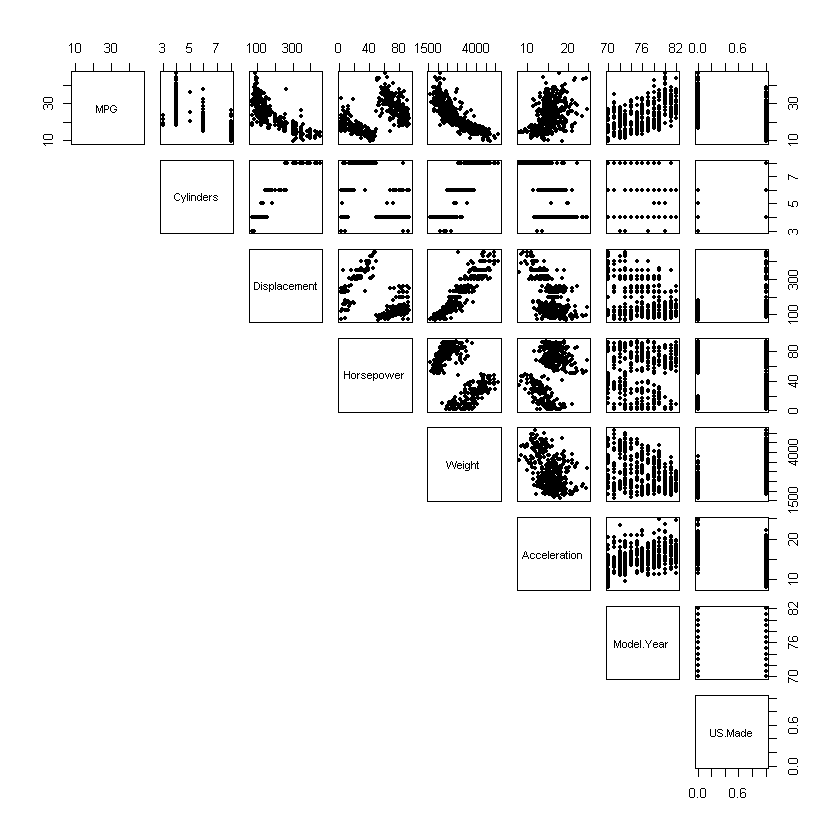

In [53]:
# pairplots of each attribute
pairs(car, pch = 20, lower.panel = NULL)

In [479]:
# make some conversion to data types
car$US.Made <- as.character(car$US.Made)
str(car)
count(car,US.Made)

'data.frame':	392 obs. of  8 variables:
 $ MPG         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ Cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ Horsepower  : num  17 35 29 29 24 42 47 46 48 40 ...
 $ Weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ Acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ Model.Year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ US.Made     : chr  "1" "1" "1" "1" ...
 - attr(*, "na.action")= 'omit' Named int  33 127 331 337 355 375
  ..- attr(*, "names")= chr  "33" "127" "331" "337" ...


US.Made,n
0,147
1,245


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


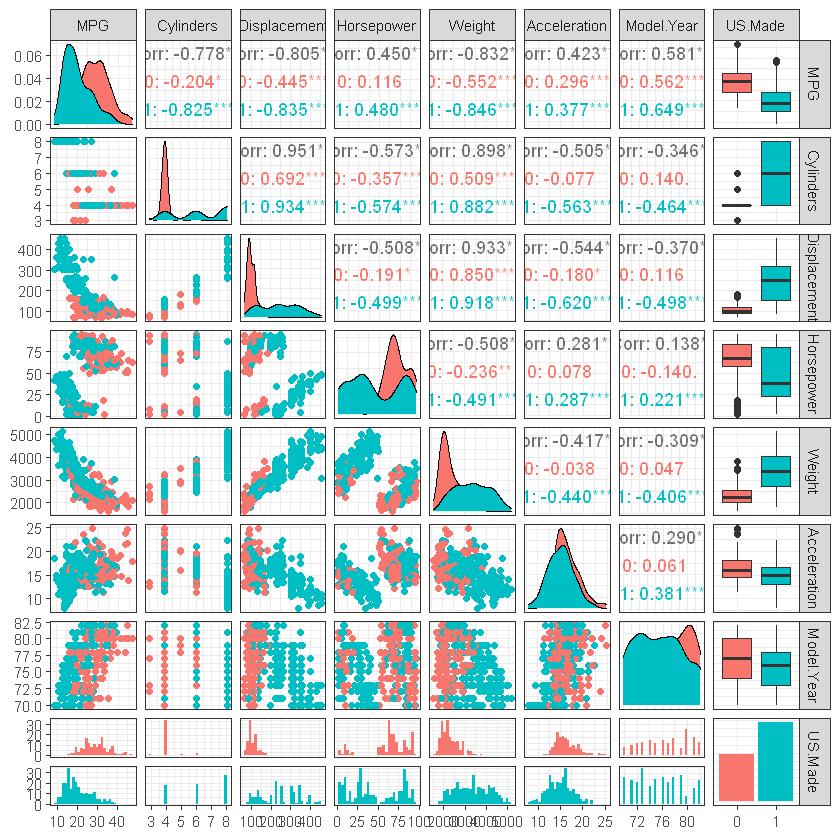

In [480]:
ggpairs(car, aes(color = US.Made)) + theme_bw()

>**Now we have a pairplot of MPG in response to all attributes, lets take an overview of the relationships of each. Displacement and Weight both have a quite strong negative relationship with MPG, meaning increase in the engine displacement or the weight of the car will result in lower MPG. The number of cylinders seems like having a slight negative relationship. Horsepower and Acceleration both have some what of a positive relationship with MPG but seemingly not very strong. The Model Year also have some impact on the MPG, models that are made in more recent years (later models) usually have a slight improvement in the miles per gallon. And finally, whether the vehicle is made in US or not doesn't affect MPG much, although the models that are not made in the US perform slightly better in MPG than US models, but it is very small and neglagible.**

In [86]:
fit_cyl = lm(MPG~Cylinders, car)
summary(fit_cyl)

fit_disp = lm(MPG~Displacement, car)
summary(fit_disp)

fit_hp = lm(MPG~Horsepower, car)
summary(fit_hp)

fit_wgt = lm(MPG~Weight, car)
summary(fit_wgt)

fit_acc = lm(MPG~Acceleration, car)
summary(fit_acc)

fit_yr = lm(MPG~Model.Year, car)
summary(fit_yr)

fit_us = lm(MPG~US.Made, car)
summary(fit_us)


Call:
lm(formula = MPG ~ Cylinders, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2413  -3.1832  -0.6332   2.5491  17.9168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.9155     0.8349   51.40   <2e-16 ***
Cylinders    -3.5581     0.1457  -24.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.914 on 390 degrees of freedom
Multiple R-squared:  0.6047,	Adjusted R-squared:  0.6037 
F-statistic: 596.6 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Displacement, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9170  -3.0243  -0.5021   2.3512  18.6128 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.12064    0.49443   71.03   <2e-16 ***
Displacement -0.06005    0.00224  -26.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.635 on 390 degrees of freedom
Multiple R-squared:  0.6482,	Adjusted R-squared:  0.6473 
F-statistic: 718.7 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Horsepower, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.116  -5.879  -0.503   4.924  21.982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.23167    0.71666  24.044   <2e-16 ***
Horsepower   0.11914    0.01196   9.959   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.978 on 390 degrees of freedom
Multiple R-squared:  0.2027,	Adjusted R-squared:  0.2007 
F-statistic: 99.17 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Weight, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9736  -2.7556  -0.3358   2.1379  16.5194 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.216524   0.798673   57.87   <2e-16 ***
Weight      -0.007647   0.000258  -29.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.333 on 390 degrees of freedom
Multiple R-squared:  0.6926,	Adjusted R-squared:  0.6918 
F-statistic: 878.8 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Acceleration, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.989  -5.616  -1.199   4.801  23.239 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.8332     2.0485   2.359   0.0188 *  
Acceleration   1.1976     0.1298   9.228   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.08 on 390 degrees of freedom
Multiple R-squared:  0.1792,	Adjusted R-squared:  0.1771 
F-statistic: 85.15 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Model.Year, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0212  -5.4411  -0.4412   4.9739  18.2088 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -70.01167    6.64516  -10.54   <2e-16 ***
Model.Year    1.23004    0.08736   14.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.363 on 390 degrees of freedom
Multiple R-squared:  0.337,	Adjusted R-squared:  0.3353 
F-statistic: 198.3 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ US.Made, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.933  -5.034  -1.034   3.892  18.966 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.1333     0.5318   54.79   <2e-16 ***
US.Made      -9.0999     0.6726  -13.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.447 on 390 degrees of freedom
Multiple R-squared:  0.3194,	Adjusted R-squared:  0.3177 
F-statistic:   183 on 1 and 390 DF,  p-value: < 2.2e-16


In [408]:
fit_all = lm(MPG~., car)
summary(fit_all)


Call:
lm(formula = MPG ~ ., data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0192 -2.1716  0.0414  1.9185 13.4499 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.013e+01  4.191e+00  -4.803 2.24e-06 ***
Cylinders    -2.378e-01  3.365e-01  -0.707  0.48016    
Displacement  1.924e-02  7.356e-03   2.615  0.00926 ** 
Horsepower    1.239e-02  7.022e-03   1.764  0.07853 .  
Weight       -7.030e-03  5.805e-04 -12.110  < 2e-16 ***
Acceleration  1.513e-01  7.695e-02   1.966  0.05005 .  
Model.Year    7.992e-01  4.980e-02  16.046  < 2e-16 ***
US.Made      -2.638e+00  4.694e-01  -5.621 3.67e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.297 on 384 degrees of freedom
Multiple R-squared:  0.8248,	Adjusted R-squared:  0.8216 
F-statistic: 258.2 on 7 and 384 DF,  p-value: < 2.2e-16


In [217]:
# confident intervals
confint(fit_all)

,2.5 %,97.5 %
(Intercept),-2.836832e+01,-11.888788927
Cylinders,-8.993305e-01,0.423752161
Displacement,4.775329e-03,0.033700865
Horsepower,-1.419792e-03,0.026192042
Weight,-8.171812e-03,-0.005888905
Acceleration,-3.399588e-05,0.302554437
Model.Year,7.012517e-01,0.897096901
US.Made,-3.560887e+00,-1.715213165


>**In this step, I have looked at the corelation coefficient between all inattributes, a series of fitted model summary for each individual attributes and MPG, as well as a fitted model summary of all attributes together with the MPG. And following are some features and coniderations that I have summarized.**
>
>* Some variables are having a really big correlation coefficient, meaning they are closely and strongly correlated. To be specific, they are Displacement vs Cylinders, Weight vs Cylinders, and Displacement vs Weight. In order to avoid multicolinearity issue in our model, we have to limit 1 or 2 variables between these three strongly correlated ones. 
>
>
>* With in the each individual fitted model, every single one of them were pretty significant when they are in the model themselves alone with MPG. 
>
>
>* But when we put them all together in one model, we can see that some variables are no longer significant, like Cylinders and Horsepower. This means that a lot of other predictors are very correlated with MPG, and in the presence of them, these two predictors are no longer required. This coresponds with our concern of the multicolinearity, and will fix the issue.**

In [467]:
fit_sgnf = update(fit_all, ~.-Cylinders-Horsepower)
summary(fit_sgnf)


Call:
lm(formula = MPG ~ Displacement + Weight + Acceleration + Model.Year + 
    US.Made, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6760 -2.1462 -0.0221  1.9033 13.3571 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.906e+01  4.021e+00  -4.741 3.00e-06 ***
Displacement  1.469e-02  5.560e-03   2.642  0.00858 ** 
Weight       -7.182e-03  5.788e-04 -12.409  < 2e-16 ***
Acceleration  1.550e-01  7.711e-02   2.011  0.04507 *  
Model.Year    7.927e-01  4.990e-02  15.887  < 2e-16 ***
US.Made      -2.569e+00  4.700e-01  -5.466 8.27e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.31 on 386 degrees of freedom
Multiple R-squared:  0.8225,	Adjusted R-squared:  0.8202 
F-statistic: 357.7 on 5 and 386 DF,  p-value: < 2.2e-16


In [468]:
# confident interval
confint(fit_sgnf)

,2.5 %,97.5 %
(Intercept),-26.966939401,-11.155853374
Displacement,0.003757895,0.025621334
Weight,-0.008319932,-0.006044065
Acceleration,0.003422218,0.306652062
Model.Year,0.694639750,0.890857175
US.Made,-3.493222977,-1.645033580


## Model Analysis and Conclusion 

>**After making some improvements, to just include the significant predictors, we have received a model with a 0.82 adjusted R-squared value, and 3.31 residual standard error. These scores have shown that this model is a pretty accurate one. The function of the model includes 5 independent variables, and can be expressed as the following formula:**
>
>>### MPG = 0.01469*X1 - 0.007182*X2 + 0.155*X3 + 0.7927*X4 - 2.569*X5 - 19.06
>>
>> Where, X1 = Displacement, X2 = Weight, X3 = Acceleration, X4 = Model.Year, X5 = US.Made.
>
>**According to the model, these five are some of the most significant and important attributes that can help me build a proper car with better performance in miles per gallon (MPG). Details are explained as follows.**
>>**Building a Proper and Out-performance Car Requires:**
>>
>> Larger engine displacement
>>
>> Lighter weight
>>
>> Faster acceleration
>>
>> More recent year models
>>
>> Not made in the US



## Making Predictions with the Model

>**Now we have a pretty precise model, and a general idea of how each attribute is affecting our model. So next, we are going to apply some values and see whether our combination of attributes can get us a car with an outstanding MPG.**

In [469]:
predict(fit_sgnf,newdata=data.frame(Displacement=455, Weight=1613, 
                                    Acceleration=24.8, Model.Year=82,US.Made=0), 
        type="response", interval="confidence")

fit,lwr,upr
44.88811,39.51749,50.25873


>**The prediction shows a result with pretty high MPG (44.89), which is almost the top MPG existing in the dataset (46.6). even with the lower bound of the prediction, we are still getting a car of 39.52 MPG, which will beat as much as 98% of the cars available in the dataset.**

# Part 3: Model Optimization and Results

>**Model with only perfect linearities are rare cases for most of the problems, Therefore, checking and integrating possible non-linearity correlations in out model is quite crucial in order to achieve our goal of optimizing the model to have a better fit and more accuracy. So next, we are going to take a look at whether there are any non-linearities and interacions between the significant attributes.**

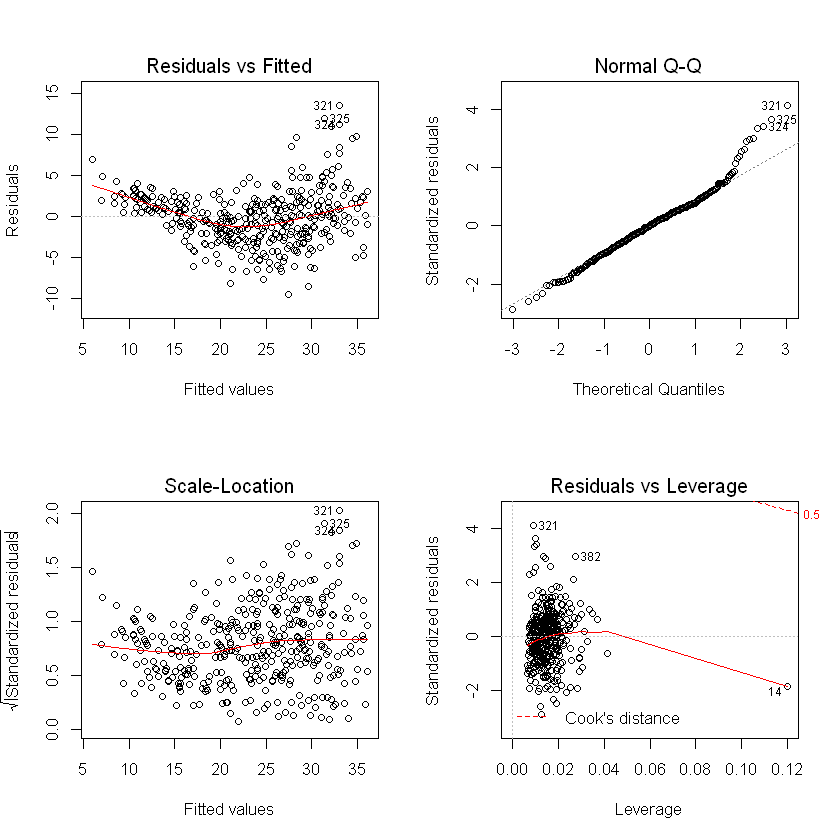

In [422]:
# plot the model with all predictors
par(mfrow=c(2,2))
plot(fit_sgnf)

>**Some aspects of the model fit are plotted, lets focus on graph located at the top left corner. It shows the residuals against fitted values, by the curve we see in the residuals in the plot, we can see that the model is not quite capturing everything, it seems like our model is highly likely is having some sort of non-linearity. So, we are going to explore the specific non-linear terms between MPG and some possible predictors.**

In [423]:
# Exploring quatratic features
fit_q_dis = lm(MPG~Displacement+I(Displacement^2), car); summary(fit_q_dis)
fit_q_wgt = lm(MPG~Weight+I(Weight^2), car); summary(fit_q_wgt)
fit_q_acc = lm(MPG~Acceleration+I(Acceleration^2), car); summary(fit_q_acc)


Call:
lm(formula = MPG ~ Displacement + I(Displacement^2), data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2165  -2.2404  -0.2508   2.1094  20.5158 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.204e+01  1.078e+00  39.011  < 2e-16 ***
Displacement      -1.379e-01  1.113e-02 -12.388  < 2e-16 ***
I(Displacement^2)  1.685e-04  2.366e-05   7.122 5.17e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.365 on 389 degrees of freedom
Multiple R-squared:  0.6888,	Adjusted R-squared:  0.6872 
F-statistic: 430.5 on 2 and 389 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Weight + I(Weight^2), data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6246  -2.7134  -0.3485   1.8267  16.0866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.226e+01  2.993e+00  20.800  < 2e-16 ***
Weight      -1.850e-02  1.972e-03  -9.379  < 2e-16 ***
I(Weight^2)  1.697e-06  3.059e-07   5.545 5.43e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.176 on 389 degrees of freedom
Multiple R-squared:  0.7151,	Adjusted R-squared:  0.7137 
F-statistic: 488.3 on 2 and 389 DF,  p-value: < 2.2e-16



Call:
lm(formula = MPG ~ Acceleration + I(Acceleration^2), data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0877  -5.5700  -0.8524   4.3827  22.9813 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -15.26045    7.79899  -1.957 0.051095 .  
Acceleration        3.79787    0.98283   3.864 0.000131 ***
I(Acceleration^2)  -0.08156    0.03056  -2.669 0.007934 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.025 on 389 degrees of freedom
Multiple R-squared:  0.194,	Adjusted R-squared:  0.1898 
F-statistic:  46.8 on 2 and 389 DF,  p-value: < 2.2e-16


The following objects are masked _by_ .GlobalEnv:

    Cylinders, Horsepower

The following objects are masked from car (pos = 3):

    Acceleration, Cylinders, Displacement, Horsepower, Model.Year, MPG,
    US.Made, Weight

The following objects are masked from car (pos = 4):

    Acceleration, Cylinders, Displacement, Horsepower, Model.Year, MPG,
    US.Made, Weight

The following objects are masked from car (pos = 5):

    Acceleration, Cylinders, Displacement, Horsepower, Model.Year, MPG,
    US.Made, Weight

The following objects are masked from car (pos = 6):

    Acceleration, Cylinders, Displacement, Horsepower, Model.Year, MPG,
    US.Made, Weight

The following objects are masked from car (pos = 7):

    Acceleration, Cylinders, Displacement, Horsepower, Model.Year, MPG,
    US.Made, Weight

The following objects are masked from car (pos = 8):

    Acceleration, Cylinders, Displacement, Horsepower, Model.Year, MPG,
    US.Made, Weight

The following objects are masked from ca

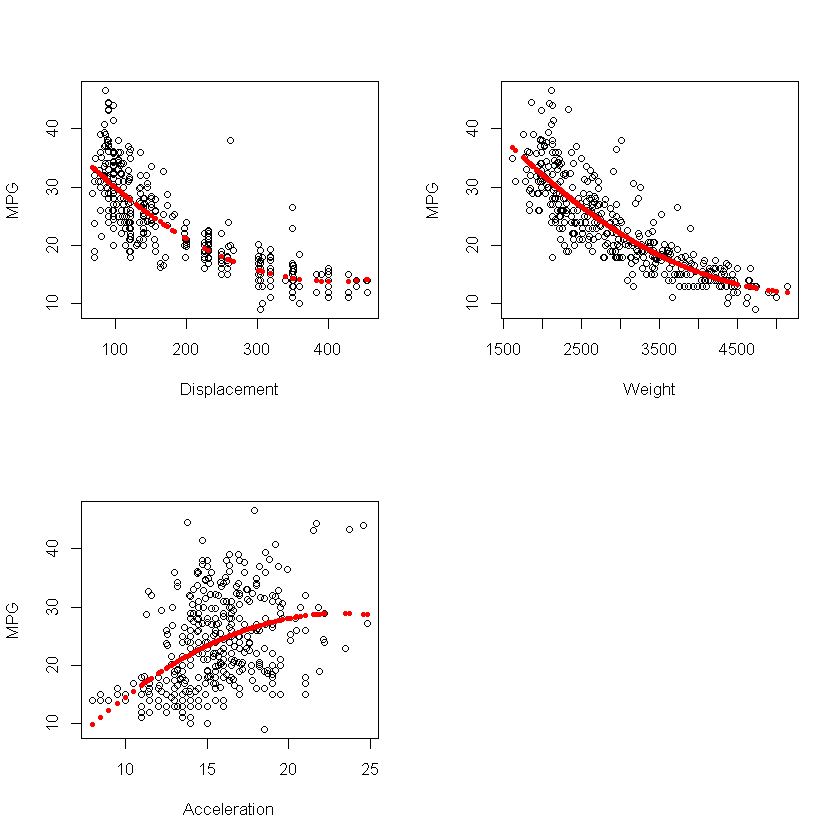

In [424]:
# plot quadratic relationships in the plots
attach(car)
par(mfrow=c(2,2))
plot(MPG~Displacement)
points(Displacement, fitted(fit_q_dis), col="red", pch=20)

plot(MPG~Weight)
points(Weight, fitted(fit_q_wgt), col="red", pch=20)

plot(MPG~Acceleration)
points(Acceleration, fitted(fit_q_acc), col="red", pch=20)

>**According to the fitted model and the plots, Displacement and Weight both show a quite nicely fitted quadratic model. On the other hand, the quatratic model does not quite nicely fit in the plots of Acceleration. Therefore we would not consider it in our final model.**

In [462]:
# Integrate the quadratic term in the model
fit_nlr = update(fit_sgnf, ~.#+I(Displacement^2)
                 +I(Weight^2)+I(Acceleration^2)-Acceleration)
summary(fit_nlr)


Call:
lm(formula = MPG ~ Displacement + Weight + Model.Year + US.Made + 
    I(Weight^2) + I(Acceleration^2), data = car)

Residuals:
   Min     1Q Median     3Q    Max 
-8.938 -1.653 -0.012  1.754 12.607 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.339e+00  3.939e+00  -0.340  0.73419    
Displacement       9.992e-03  4.874e-03   2.050  0.04103 *  
Weight            -2.091e-02  1.527e-03 -13.696  < 2e-16 ***
Model.Year         8.350e-01  4.502e-02  18.547  < 2e-16 ***
US.Made           -1.445e+00  4.359e-01  -3.315  0.00100 ** 
I(Weight^2)        2.188e-06  2.295e-07   9.531  < 2e-16 ***
I(Acceleration^2)  6.417e-03  2.051e-03   3.128  0.00189 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.972 on 385 degrees of freedom
Multiple R-squared:  0.8572,	Adjusted R-squared:  0.855 
F-statistic: 385.2 on 6 and 385 DF,  p-value: < 2.2e-16


>**Then we are going to check for the interaction terms. This will be done by testing out different combination of the predictors.**

In [472]:
# Explore interactions
fit_opt = update(fit_sgnf, ~.-Acceleration
                 +I(Weight^2)+I(Acceleration^2)+Cylinders*Horsepower)
summary(fit_opt)


Call:
lm(formula = MPG ~ Displacement + Weight + Model.Year + US.Made + 
    I(Weight^2) + I(Acceleration^2) + Cylinders + Horsepower + 
    Cylinders:Horsepower, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0815 -1.7104 -0.0226  1.7047 12.6638 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.077e+00  4.327e+00  -0.480 0.631506    
Displacement          1.219e-02  6.601e-03   1.846 0.065594 .  
Weight               -2.061e-02  1.551e-03 -13.287  < 2e-16 ***
Model.Year            8.377e-01  4.521e-02  18.531  < 2e-16 ***
US.Made              -1.495e+00  4.400e-01  -3.399 0.000748 ***
I(Weight^2)           2.153e-06  2.323e-07   9.266  < 2e-16 ***
I(Acceleration^2)     6.292e-03  2.084e-03   3.019 0.002706 ** 
Cylinders            -1.277e-01  3.570e-01  -0.358 0.720758    
Horsepower            4.295e-03  2.683e-02   0.160 0.872884    
Cylinders:Horsepower  3.689e-04  5.013e-03   0.074 0.941374    
---
Signif.

## Model Analysis and Conclusion

>**During the process of figuring out possible interactions, I have included all the combinations of any two attributes, and I basically run the model again everytime when a new pair of interaction is included. By omitting the insignificant terms and only keeping the significant ones, it gave us a result of model as above. Comparing to the model that we established in the previous section, the additional 1 interaction term added is:**
>
>>Cylinders : Horsepower
>>
>
>**And the 2 quadratic term added are:**
>
>> Weight ^ 2
>>
>> Acceleration ^ 2
>
> **Now we have a even better fitted model with a r-squared value of 0.8845, this has a significant improve comparing to the linear model (0.82) that we developed during last section. The residual standard error had also been reduced to 2.697, comparing to the 3.31 from the previous model. The function of the optimized model can be expressed as the following formula:**
>
>>### MPG = 0.01219*X1 - 0.02061*X2 + 0.8377*X3 - 1.495*X4 - 0.1277*X5 + 0.0030689*X6 + 0.000002153*(X2^2) + 0.006292*(X7^2) + 0.003689*(X5:X6) - 2.077
>>
>> Where, X1 = Displacement, X2 = Weight, X3 = Model.Year, X4 = US.Made, X5 = Cylinders, X6 = Horsepower, X7 = Acceleration.
>
>**When implementing the optimized model, we should try to lower the attributes with negtive sign in front, and increase the attributes with positive sign in front. With this model, a proper car with a higher MPG can be developed if following these rules.**

## Making Predictions with the Model

>**Now we have a pretty high scored final optimized model, and a general idea of how each attribute is affecting our final model. So one last step, we are going to apply some values and see whether our combination of attributes can get us a finalized car with an outstanding MPG.**

In [482]:
predict(fit_opt,newdata=data.frame(Displacement=455, Weight=1613, Model.Year=82,US.Made=0,
                                   Cylinders=3, Horsepower=94, Acceleration=24.8), 
        type="response", interval="confidence")

fit,lwr,upr
48.5031,42.28692,54.71928


>**The prediction shows a result with a really high MPG (48.5), increased from the previous model for almost 4 MPG. It is also higher than any existing record of MPG in the dataset (for the highest in the dataset being 46.6). Even with the lower bound of the prediction, we are still getting a car of 42.3 MPG, which will beat as much as 99% of the cars available in the dataset.**
>
>**In conclusion, can really help our manufacutre to to determing the exact attributes and values that can contribute to higher gas mileage so that they achieve the goal of designing a more fuel efficient vehicle.**